In [1]:
import pickle

from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.evaluation.evaluator_manager_triplets import EvaluatorManager as TripletsEvaluatorManager

from src.utils.context import Context

from utils_martina.my_utils import *

In [2]:
import torch
torch.manual_seed(0)

import random
random.seed(0)

import numpy as np
np.random.seed(0)

In [3]:
# Set patient and record (same channels)

observations = ["chb01_03", "chb01_04", "chb01_15", "chb01_16", "chb01_18", "chb01_21", "chb01_26"]
# observations = ["chb03_01", "chb03_02", "chb03_03", "chb03_04", "chb03_34", "chb03_35", "chb03_36"]

# observations = ["chb02_16", "chb02_19"]

# observations = ["chb04_28"]
# observations = ["chb05_06", "chb05_13", "chb05_16", "chb05_17", "chb05_22"]
# observations = ["chb06_01", "chb06_04"] #, "chb06_09", "chb06_10", "chb06_13", "chb06_18", "chb06_24"]

# observations = ["PN00_1", "PN00_2", "PN00_4", "PN00_5"]
# observations = ["PN14_1", "PN14_2", "PN14_3", "PN14_4"]

# observations = ["PN14_4"]
# observations = ["chb01_16"]

create_dataset_json(observations)

In [4]:
logs_path = "..\\..\\explainability\GRETEL-repo\\output\\logs\\"
eval_manager_path = "..\\..\\explainability\GRETEL-repo\\output\\eval_manager\\"

## Removing cache data

In [5]:
remove_cache = True

if remove_cache:
    list_folders = [".\data\cache\datasets", ".\data\cache\explainers", ".\data\cache\oracles"]

    for folder in list_folders:
        for file in os.listdir(folder):
            if file.startswith("GCS-"):  # Checks if the file begins with "GCS-"
                cache_path = os.path.join(folder, file)
                if os.path.isfile(cache_path):
                    os.remove(cache_path)
                    print(f"Removed file: {cache_path}")
                elif os.path.isdir(cache_path):
                    shutil.rmtree(cache_path)
                    print(f"Removed folder: {cache_path}")

Removed file: .\data\cache\datasets\GCS-28e49373646e3a1aa4f78d3b3cf52c7d
Removed folder: .\data\cache\oracles\GCS-28e49373646e3a1aa4f78d3b3cf52c7d


## Run Gretel experiment

In [6]:
# NOTICE: If it crashes, check if there are any OracleTorch files from the future!

In [7]:
# path = 'config/GCS-GCN.jsonc'
path = 'config/GCS-perfect.jsonc'
# path = 'config/GCS-SVM.jsonc'
# path = 'config/GCS-KNN.jsonc'

print(observations)

print(f"Generating context for: {path}")
context = Context.get_context(path)
context.run_number = -1

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info(
    "Creating the evaluation manager......................................................."
)

if 'doe-triplets' in context.conf:
    context.logger.info("Creating the TRIPLET evaluators........................................................")
    eval_manager = TripletsEvaluatorManager(context)
if 'do-pairs' in context.conf:
    context.logger.info("Creating the PAIRED evaluators...............................................................") ### Usiamo questo
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators...............................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)

eval_manager.evaluate()

# Additional stuff
print('--------------------------------------')

for i in range(len(eval_manager._evaluators)):
    # context.logger.info(f"graph_ids: {eval_manager._evaluators[i].get_instance_and_counterfactual_ids()}") # NON È STATO SISTEMATO PER CONTEMPLARE IL CASO DI PIU' PAZIENTI
    context.logger.info(f"graph_metrics: {eval_manager._evaluators[i].get_instance_and_counterfactual_graph_metrics()}")

['chb01_03', 'chb01_04', 'chb01_15', 'chb01_16', 'chb01_18', 'chb01_21', 'chb01_26']
Generating context for: config/GCS-perfect.jsonc
2025-05-20 11:31:50,323 | INFO | 5032 - Executing: config/GCS-perfect.jsonc Run: -1
2025-05-20 11:31:50,373 | INFO | 5032 - Creating the evaluation manager.......................................................
2025-05-20 11:31:50,433 | INFO | 5032 - Creating the PAIRED evaluators...............................................................
2025-05-20 11:31:50,593 | INFO | 5032 - Creating: GCS-7461d1da0d4c1403016b336840abe8b6
2025-05-20 11:31:50,593 | INFO | 5032 - Instantiating: src.dataset.generators.gcs.GCS
2025-05-20 11:32:00,523 | INFO | 5032 - Saved: GCS-7461d1da0d4c1403016b336840abe8b6
2025-05-20 11:32:00,573 | INFO | 5032 - Created: GCS-7461d1da0d4c1403016b336840abe8b6
2025-05-20 11:32:00,624 | INFO | 5032 - Creating: PerfectOracle-ab1ac7759de7849d8ddbff3fbf5a8e61
2025-05-20 11:32:00,654 | INFO | 5032 - PerfectOracle trained in: 0.0 secs
2025-0

In [8]:
# Save eval_manager to file
file_name = get_most_recent_file(logs_path).split('.')[0]

with open(eval_manager_path + file_name + ".pkl", 'wb') as f:
    pickle.dump(eval_manager, f)

## _______________________________________________________________

In [9]:
import datetime

now = datetime.datetime.now()
print("Last full run:", now.strftime("%d/%m/%Y, ore %H:%M"))

Last full run: 20/05/2025, ore 11:32


In [10]:
import winsound

winsound.Beep(440, 500)
winsound.Beep(400, 500)
winsound.Beep(440, 500)

In [11]:
# from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer

# results_path = "output\\results"
# stats_file_path = "output"
# res = data_analyzer.create_aggregated_dataframe(results_path)
# res.to_csv(stats_file_path)
# res

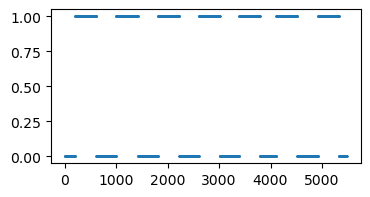

In [ ]:
import matplotlib. pyplot as plt

def get_times_outputs(eval_manager):
    times = []
    outputs = []

    for instance in eval_manager._evaluators[0].dataset.instances:
        times.append(instance.id)
        outputs.append(eval_manager._evaluators[0]._oracle.predict(instance))
    
    return times, outputs

times, outputs = get_times_outputs(eval_manager)

# outputs[100] = 0
# outputs[102] = 0
# outputs[300] = 1
# outputs[450:500] = [1] * (500 - 450)
# outputs[700:710] = [0] * (710 - 700)

# plt.figure(figsize=(4,2))
# plt.plot(outputs,linestyle='None', marker='x',ms=1)
# plt.show()

In [24]:
def lookback_oracolo(outputs, L=50, threshold=0.9):
    result = {} # Dictionary to store detected intervals
    i = 0       # Index to iterate through the outputs list

    while i < len(outputs):

        # Beginning of a seizure condition
        if outputs[i] == 1:

            # Find the continuous segment of 1s starting at index i
            j = i
            while j < len(outputs) and outputs[j] == 1:
                j += 1

            # Set the initial 'end' of the lookback window
            end = i - 1

            # Move the lookback window backward until it contains enough zeros
            start = end - L + 1
            while start >= 0 and outputs[start:end + 1].count(0) < int(L * threshold):
                end -= 1
                start = end - L + 1
                if end < 0:
                    break

            # Ensure the start doesn't go below 0
            if start < 0:
                start = 0

            # Save the interval (start, end) for each index between i and j
            for k in range(i, j):
                result[times[k]] = (start, end)

            # Move the index to the end of the current seizure (segment of 1s)
            i = j
        else:
            # Continue scanning if current value is not 1
            result[times[i]] = (i, i)
            i += 1

    return result


def plot_intervals(intervals):
    plt.figure(figsize=(6,8))

    for i, (idx, interval) in enumerate(intervals.items()):
        start, end = interval
        time = idx
        y = i

        # Draw a horizontal line for the interval and mark the point
        plt.hlines(y, xmin=start, xmax=end, color='blue', linewidth=0.5)
        plt.plot(time, y, 'ro', ms=0.5)

    plt.xlabel('Index')
    plt.ylabel('Offset')
    plt.grid(True)
    plt.show()

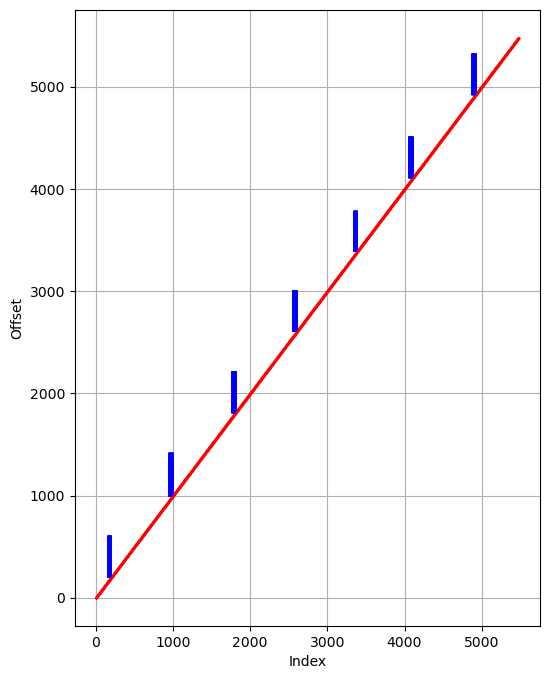

In [25]:
intervals = lookback_oracolo(outputs, L=60, threshold=1)
plot_intervals(intervals)

In [26]:
intervals[times[0]]

(0, 0)